## Scenario generation


In [1]:
# import pandas and read "Data/all_dat_merged.csv" into a dataframe
import pandas as pd
df = pd.read_csv("../market data/merged-data.csv")
# check the first 5 rows of the dataframe
print(df.head())
# check the last 5 rows of the dataframe
print(df.tail())
# check the shape of the dataframe
df.shape

               TimeUTC   spotMeas   spotPred  imbalMeas  windMeas   windFor  \
0  2022-01-01 01:00:00  43.220001  43.104021      43.22  0.405336  0.349182   
1  2022-01-01 02:00:00  45.459999  45.593261      45.46  0.367900  0.293244   
2  2022-01-01 03:00:00  37.669998  45.770621      37.67  0.337995  0.250215   
3  2022-01-01 04:00:00  39.700001  40.260896      39.70  0.320568  0.183735   
4  2022-01-01 05:00:00  40.590000  39.473605      40.59  0.280766  0.138769   

   loadFor       trans  
0     1889 -264.400024  
1     1857 -217.299988  
2     1824  105.100006  
3     1831  386.299988  
4     1887  476.200012  
                   TimeUTC    spotMeas    spotPred  imbalMeas  windMeas  \
10171  2023-02-28 20:00:00  158.270004  160.280663      97.00  0.016997   
10172  2023-02-28 21:00:00  153.779999  160.507938     153.78  0.017857   
10173  2023-02-28 22:00:00  142.139999  140.869043     142.14  0.016566   
10174  2023-02-28 23:00:00  133.080002  128.167204      45.39  0.021730   


(10176, 8)

In [2]:
# find index where the column "imbalMeas" is null
idx = df[df["imbalMeas"].isnull()].index
df.imbalMeas[idx] = df.spotMeas[idx]

/var/folders/f_/09zgsjw54xvfw3k8907hvrnw0000gn/T/ipykernel_18752/2400920473.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.imbalMeas[idx] = df.spotMeas[idx]


In [3]:
# find empirical CDF of windMeas, spotMeas, and imbalMeas
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

# compute empirical CDF of windMeas
power_actual_sorted = np.sort(df['windMeas'])

# compute empirical CDF of spotMeas
nominal_sorted = np.sort(df['spotMeas'])

# compute empirical CDF of imbalMeas
bal_price_sorted = np.sort(df['imbalMeas'])



# define lookup function that outputs the CDF value for a given x
def lookup_cdf(x, x_sorted):
    return np.searchsorted(x_sorted, x, side='right') / len(x_sorted)

funECDF_power = interp1d(power_actual_sorted, [lookup_cdf(i,power_actual_sorted) for i in power_actual_sorted],bounds_error = False, fill_value=(0,1), assume_sorted=True)
funECDF_nominal = interp1d(nominal_sorted, [lookup_cdf(i,nominal_sorted) for i in nominal_sorted],bounds_error = False, fill_value=(0,1), assume_sorted=True)
funECDF_bal_price = interp1d(bal_price_sorted, [lookup_cdf(i,bal_price_sorted) for i in bal_price_sorted],bounds_error = False, fill_value=(0,1), assume_sorted=True)

# ECDF
def ecdf_power(x):
    return (funECDF_power(x))

def ecdf_nominal(x):
    return (funECDF_nominal(x))

def ecdf_bal_price(x):
    return (funECDF_bal_price(x))

funIECDF_power = interp1d([lookup_cdf(i,power_actual_sorted) for i in power_actual_sorted], power_actual_sorted,bounds_error = False, fill_value=(min(power_actual_sorted),max(power_actual_sorted)), assume_sorted=True)
funIECDF_nominal = interp1d([lookup_cdf(i,nominal_sorted) for i in nominal_sorted], nominal_sorted,bounds_error = False, fill_value=(min(nominal_sorted),max(nominal_sorted)), assume_sorted=True)
funIECDF_bal_price = interp1d([lookup_cdf(i,bal_price_sorted) for i in bal_price_sorted], bal_price_sorted,bounds_error = False, fill_value=(min(bal_price_sorted),max(bal_price_sorted)), assume_sorted=True)


# inverse ECDF
def iecdf_power(x):
    return (funIECDF_power(x))

def iecdf_nominal(x):
    return (funIECDF_nominal(x))

def iecdf_bal_price(x):
    return (funIECDF_bal_price(x))


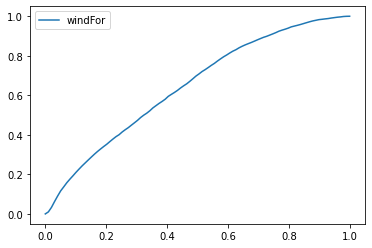

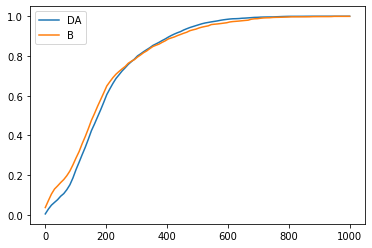

In [4]:
# list of x values to plot from 0 to 1
x = np.linspace(0, 1, 100)
x2 = np.linspace(0, 1000, 100)

# plot the CDFs
plt.plot(x, ecdf_power(x), label='windFor')
plt.legend()
plt.show()
# new plot
plt.plot(x2, ecdf_nominal(x2), label='DA')
plt.plot(x2, ecdf_bal_price(x2), label='B')
plt.legend()
plt.show()


In [5]:
# compute the transform of the variables
y_power = ecdf_power(df['windMeas'])
y_nominal = ecdf_nominal(df['spotMeas'])
y_bal_price = ecdf_bal_price(df['imbalMeas'])


In [6]:
# all y==0 are set to 0.0001
y_power[y_power == 0] = 0.01
y_nominal[y_nominal == 0] = 0.01
y_bal_price[y_bal_price == 0] = 0.01

# all y==1 are set to 0.9999
y_power[y_power == 1] = 0.99
y_nominal[y_nominal == 1] = 0.99
y_bal_price[y_bal_price == 1] = 0.99


(array([0.00131963, 0.        , 0.00131963, 0.00131963, 0.00131963,
        0.        , 0.00263925, 0.00263925, 0.00395888, 0.00395888,
        0.00395888, 0.00791775, 0.00659813, 0.01187663, 0.01187663,
        0.01451588, 0.01715513, 0.01715513, 0.03035139, 0.01979438,
        0.04354764, 0.04486727, 0.04750652, 0.05674389, 0.00395888,
        0.        , 0.22433633, 0.09897191, 0.11084854, 0.12404479,
        0.1398803 , 0.15439618, 0.17023168, 0.18738682, 0.20586157,
        0.22169708, 0.24149146, 0.25864659, 0.26260547, 0.30747273,
        0.31011198, 0.32726712, 0.34046337, 0.35497925, 0.36685588,
        0.37741288, 0.38005213, 0.38665026, 0.36025775, 0.44603341,
        0.39060914, 0.40380539, 0.39060914, 0.37609326, 0.38137176,
        0.37345401, 0.35497925, 0.34046337, 0.32726712, 0.30483348,
        0.29955498, 0.2744821 , 0.25996622, 0.24149146, 0.22169708,
        0.20454195, 0.18870644, 0.17023168, 0.15175693, 0.14251955,
        0.12404479, 0.11084854, 0.09501303, 0.08

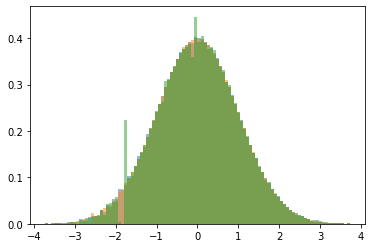

In [7]:
# transform y varialbes to using inverse normal from scipy
from scipy.stats import norm
x_power = norm.ppf(y_power)
x_nominal = norm.ppf(y_nominal)
x_bal_price = norm.ppf(y_bal_price)

# plot the transformed variables
plt.hist(x_power, bins=100, density=True, alpha=0.5, label='Power')
plt.hist(x_nominal, bins=100, density=True, alpha=0.5, label='DA')
plt.hist(x_bal_price, bins=100, density=True, alpha=0.5, label='B')


In [8]:
# Split observations into vectors of length 8
x_power_8 = np.array_split(x_power, len(x_power)/8)
x_nominal_8 = np.array_split(x_nominal, len(x_nominal)/8)
x_bal_price_8 = np.array_split(x_bal_price, len(x_bal_price)/8)


In [9]:
# concatenate the vectors into a matrix
X = np.column_stack((x_power_8, x_nominal_8, x_bal_price_8))


In [10]:
# compute covariance of X (remove observations with nan values)
cov_X = np.cov(X, rowvar=False, ddof=0, aweights=None, fweights=None, bias=False)

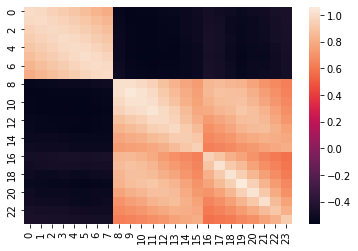

In [11]:
# print covariance matrix as heatmap
import seaborn as sns
sns.heatmap(cov_X, annot=False)
plt.show()



In [12]:
# set seed
np.random.seed(420)

# sample 500 observations from the multivariate normal distribution
X_sample = np.random.multivariate_normal(np.zeros(24), cov_X, 500)


In [13]:
# transform the sample back to the original variables
y_power_sample = norm.cdf(X_sample[:,0:8])
y_nominal_sample = norm.cdf(X_sample[:,8:16])
y_bal_price_sample = norm.cdf(X_sample[:,16:24])

In [14]:
# deine list
power_actual_sample = []
nominal_sample = []
bal_price_sample = []

# loop through each row of the sample
for i in range(0, len(y_power_sample)):
    # inverse CDF of windMeas
    power_actual_sample.append(iecdf_power(y_power_sample[i]))
    # inverse CDF of spotMeas
    nominal_sample.append(iecdf_nominal(y_nominal_sample[i]))
    # inverse CDF of imbalMeas
    bal_price_sample.append(iecdf_bal_price(y_bal_price_sample[i]))
    


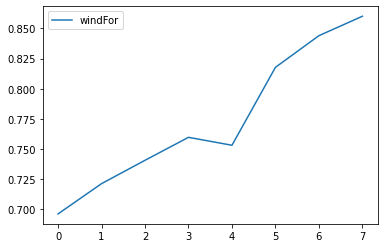

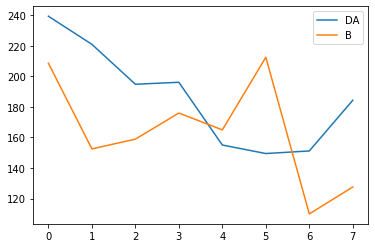

In [15]:
# plot the first sample
plt.plot(power_actual_sample[0], label='windFor')
plt.legend()
plt.show()

plt.plot(nominal_sample[0], label='DA')
plt.plot(bal_price_sample[0], label='B')
plt.legend()
plt.show()




In [16]:
# stack all samples into a matrix
X_sample = np.column_stack((nominal_sample, bal_price_sample,power_actual_sample))
X_sample.shape

(500, 24)

In [17]:
# save the samples to a csv file
np.savetxt("X_sample.csv", X_sample, delimiter=",")

